# Analysis of Covariate Shift Tuning
Two major hyperparameters to training KLIEP weights are:
* The Gaussian width (a hyperparamter of the Gaussian kernel distance metric)
* The number of test points selected as kernel centers

These two hyperparamters were tested in a grid search fashion and various aspects these trained models will be explored within this notebook. 

In [1]:
# Load libraries
import pandas as pd
import numpy as np

import pickle
import os
import pdb

import matplotlib.pyplot as plt

## Helper Functions

In [2]:
# Function for loading pickle files
def load_pickle(fname):
    with open(fname, 'rb') as handle:
        return pickle.load(handle)

## Main Script

In [3]:
# Load data
data_path = './full_cs_weights_v1/'
# Keys for separating by number of kernels
kernel_vals = [100, 250, 500, 750, 1000]
kernel_keys = ['numk%s.'%kernel_vals[i] for i in range(len(kernel_vals))]
results = [[] for i in range(len(kernel_vals))]
for f in sorted(os.listdir(data_path)):
    for idx, key in enumerate(kernel_keys):
        if key in f:
            results[idx].append(load_pickle(data_path + f))

### Impact of Gaussian Width

In [4]:
# Function for plotting KLIEP weights for various gaussian widths
def plot_gw(results, start, end):
    # Sort results by gaussian width
    sorted_results = sorted(results, key=lambda x: x['width'])
    plt.figure(figsize=(12, 7))
    xaxis = list(range(start, end))
    colors = plt.cm.jet(np.linspace(0,1,len(results)))
    for idx, r in enumerate(sorted_results):
        plt.scatter(xaxis, r['weights'][start:end], c=colors[idx], label=str(r['width']), s=10)
    plt.xlabel('Sample')
    plt.ylabel('Weight')
    plt.title('Effect of Varying Gaussian Width for %s Kernels'%r['num_kernels'])
    plt.legend(loc='lower right')
    plt.savefig('./images/gw_%snk.png'%r['num_kernels'])
    plt.show()
    return None

In [5]:
start = 50
end = 75

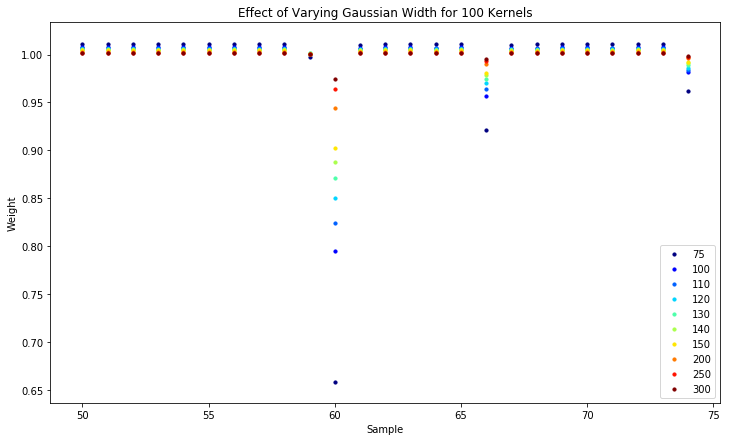

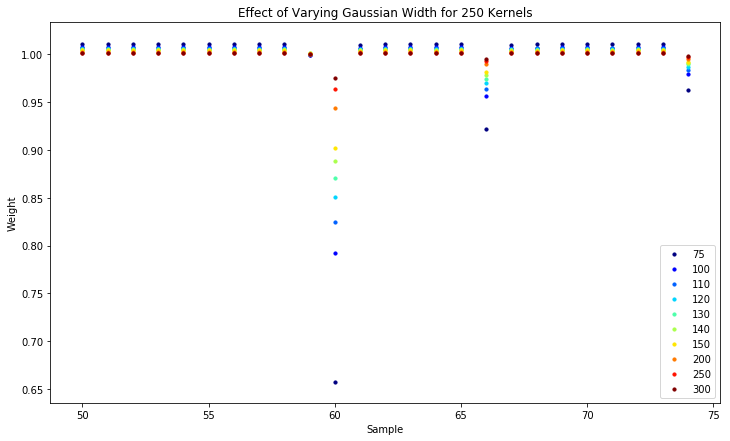

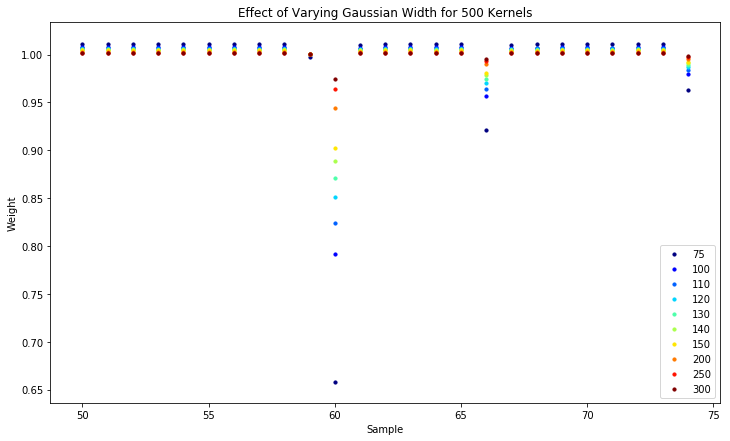

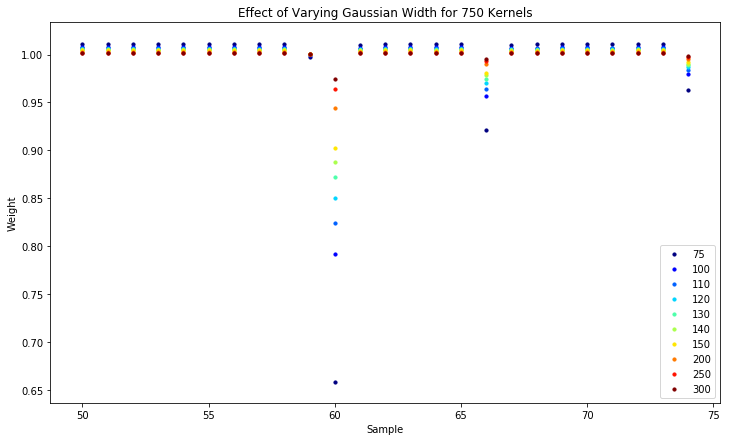

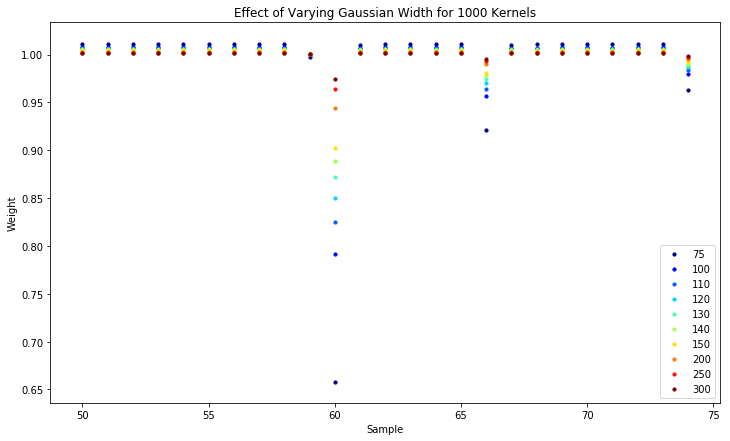

In [6]:
for r in results:
    plot_gw(r, start, end)

### Impact of Number of Kernels

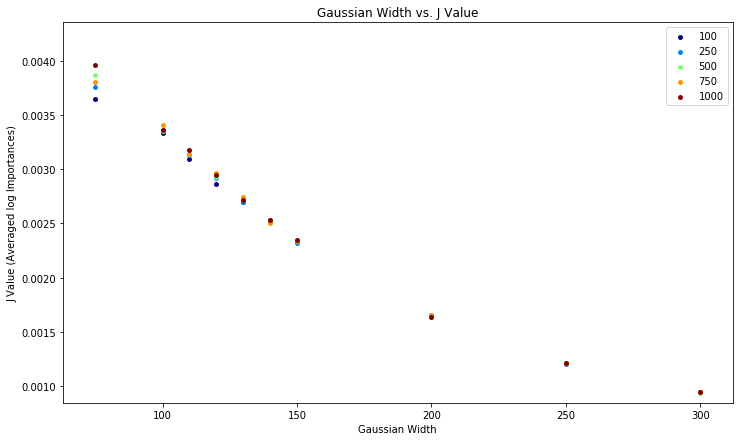

In [7]:
plt.figure(figsize=(12, 7))
colors = plt.cm.jet(np.linspace(0, 1, len(results)))
ymin = 999999
ymax = -999999
for idx, r in enumerate(results):
    x = np.array([e['width'] for e in r])
    y = np.array([e['j_value'] for e in r])
    ymin = np.minimum(ymin, np.min(y))
    ymax = np.maximum(ymax, np.max(y))
    plt.scatter(x, y, c=colors[idx], label=str(kernel_vals[idx]), s=15)
plt.ylim([ymin*.9, ymax*1.1])
plt.xlabel('Gaussian Width')
plt.ylabel('J Value (Averaged log Importances)')
plt.title('Gaussian Width vs. J Value')
plt.legend(loc='upper right')
plt.savefig('./images/gw_vs_jval.png')
plt.show()